<a href="https://colab.research.google.com/github/hernanmorales-navarrete/EPIC_4/blob/main/Day_2/Intro_DeepLearning_BioimageAnalysis/code/0_Intro_DigitalImages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Digital Images

## 1. Images are just numerical arrays

A digital image is a multi-dimensional numerical array that is formed by pixels (voxels in 3D).

- Dimensions of an image : Width, heigth, depth, channels ('colors'), time
- Each pixel/voxel has brightness or intensity (black to white) represented by a number


#### Import packages and modules



In [1]:
import numpy as np                 # Array manipulation package
import matplotlib.pyplot as plt    # Plotting package
import skimage.io as io            # Image file manipulation module
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Read and diplay a 2D multicolor image

Image dimension:  (694, 786, 3)
Number of Channels:  3


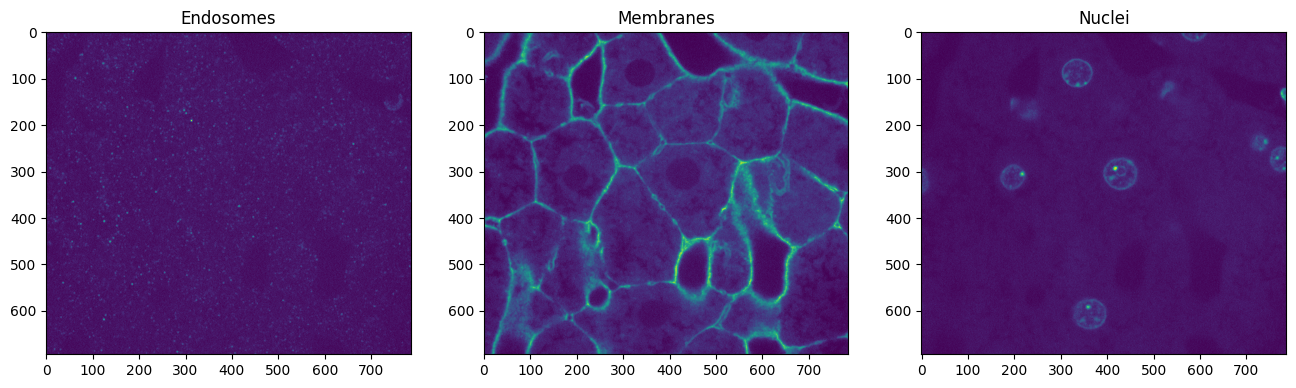

In [3]:
img = io.imread('/content/drive/MyDrive/IntroBioImageAnalysis-main/2D_image_nuclei_cells_liver.tif')        # import image
print('Image dimension: ', img.shape)
print('Number of Channels: ', img.shape[2])
ChannelNames = ["Endosomes", "Membranes", "Nuclei"]  # list with channels' names

plt.figure(figsize=(16,8))

ch = 0
while ch < img.shape[2]:
    plt.subplot(1,3,ch+1)
    plt.title(ChannelNames[ch])
    plt.imshow(img[:,:,ch])       # create image object and visualise
    ch = ch +1


Let's have a closer look at one of the channels

Images are just numerical arrays
Image dimension:  (50, 50)
Data type :  uint8


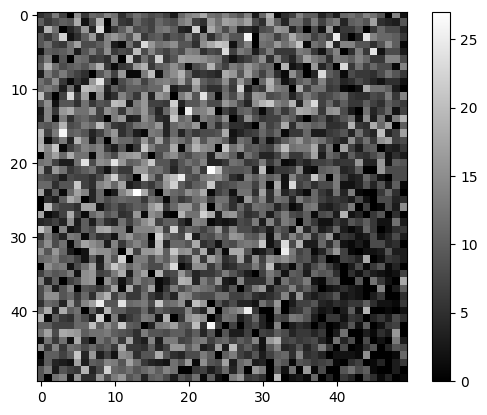

In [4]:
subimage = img[0:50,0:50,2]
print('Images are just numerical arrays')
print('Image dimension: ', subimage.shape)
print('Data type : ', subimage.dtype) # check the data type
plt.imshow(subimage, cmap='gray')
plt.colorbar();

Let's create an image with random (integers) intensity values between 0 and 255 (8 bit-depth)

A image is just a numerical array: 
 [[ 96 174 166  21  49 253 105 193 144 143]
 [ 98 189 144 178 177 108 100  36 172 207]
 [249 157 135 112 151  85  21  40 122 234]
 [ 88  38 217 108  73 131  69  14 183   8]
 [134 165  60  62 227  89 197 176 176 171]
 [ 76 127  85  27  18 162 114 233 194 226]
 [105 154  94 226  53  87 133 221 193 184]
 [127 159 229   8  68 103  34 126 187 248]
 [117  71 243 213 190 204 212 184 122 243]
 [250   6 128 186 252 223  34 150 242  21]]
The image is an :  <class 'numpy.ndarray'>
Data type :  uint8
Image with Random intensity values


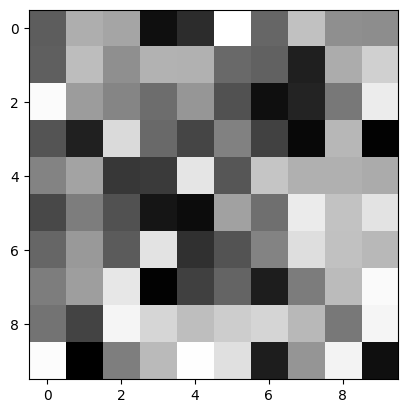

In [6]:
img2=np.random.randint(0,255,[10,10]) # create random array of random numbers
img2_uint8 = img2.astype(np.uint8) # convert to uint8
print('A image is just a numerical array: \n', img2)
np.savetxt('randimg.txt', img2_uint8, fmt='%d') # save as text file

dataimg = np.loadtxt("randimg.txt", dtype='uint8')   # load txt file and a numpy array with data type uint8
print('The image is an : ', type(dataimg)) # check imported data is a numpy array
print('Data type : ',dataimg.dtype) # check the data type
plt.imshow(dataimg, interpolation="none", cmap='gray') # visualise as image, interpolation=none shows actual pixels, cmap is the choice of color map
print('Image with Random intensity values')
plt.show()

## 2. Image Brightness and Bit Depth


The brightness (or luminous brightness) of a digital image is a measure of relative intensity values across the pixel array after the image.



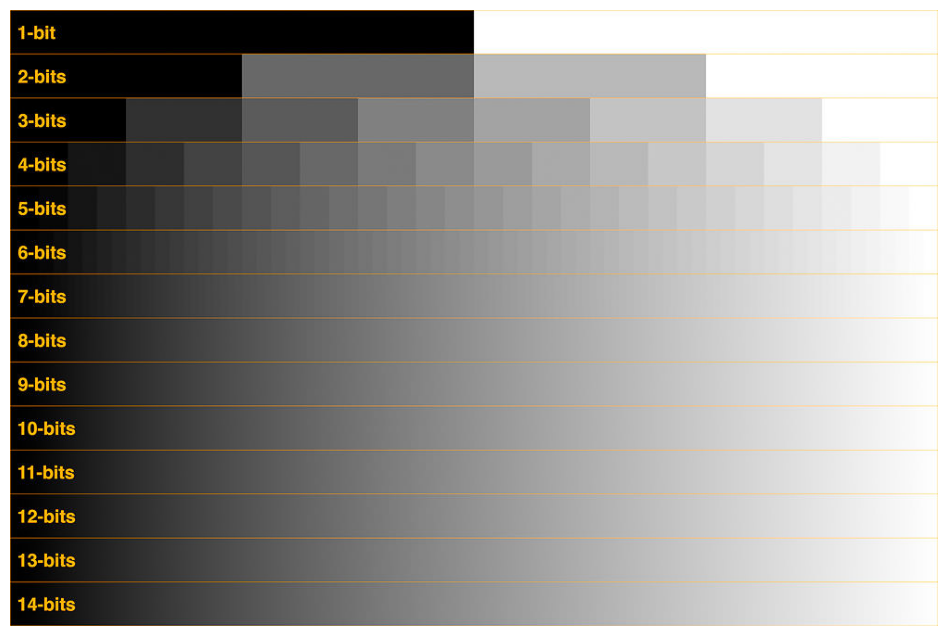

In [8]:
imgBitDepth = io.imread('/content/drive/MyDrive/IntroBioImageAnalysis-main/graylevels.jpg')
plt.figure(figsize=(16,8))
plt.imshow(imgBitDepth)
plt.axis('off')
plt.show;

Check an image with different gray levels

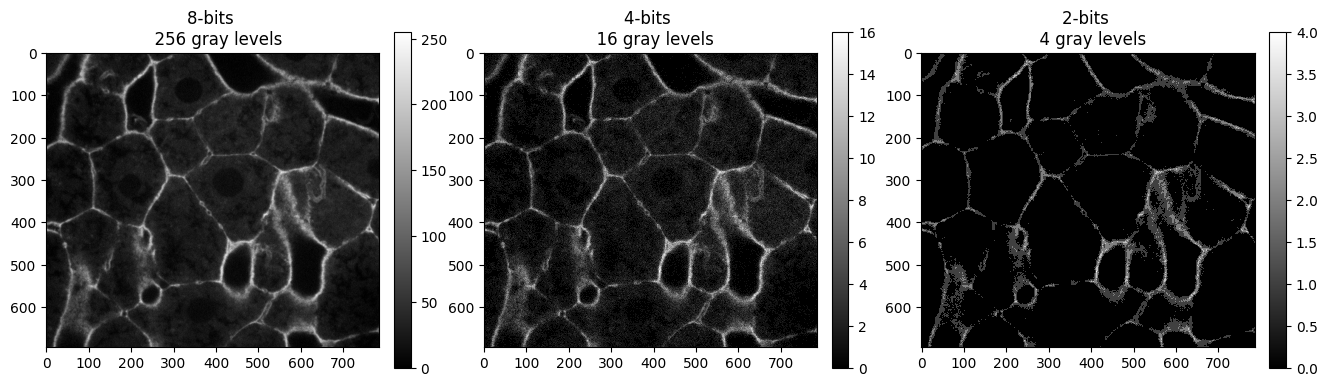

In [9]:
img8bit= img[:,:,1]

def convert(img, target_type_min, target_type_max, target_type):
    imin = img.min()
    imax = img.max()

    a = (target_type_max - target_type_min) / (imax - imin)
    b = target_type_max - a * imax
    new_img = (a * img + b).astype(target_type)
    return new_img


plt.figure(figsize=(16,8))

plt.subplot(1,3,1)
plt.title('8-bits \n  256 gray levels')
plt.imshow(img8bit, cmap='gray')
plt.colorbar(fraction=0.046, pad=0.04)

img4bit = convert(img8bit, 0, 16, np.uint8)
plt.subplot(1,3,2)
plt.title('4-bits \n  16 gray levels')
plt.imshow(img4bit, interpolation="none", cmap='gray')
plt.colorbar(fraction=0.046, pad=0.04)

img2bit = convert(img8bit, 0, 4, np.uint8)
plt.subplot(1,3,3)
plt.title('2-bits \n  4 gray levels')
plt.imshow(img2bit, interpolation="none", cmap='gray')
plt.colorbar(fraction=0.046, pad=0.04)
plt.show()

Same for an small inset

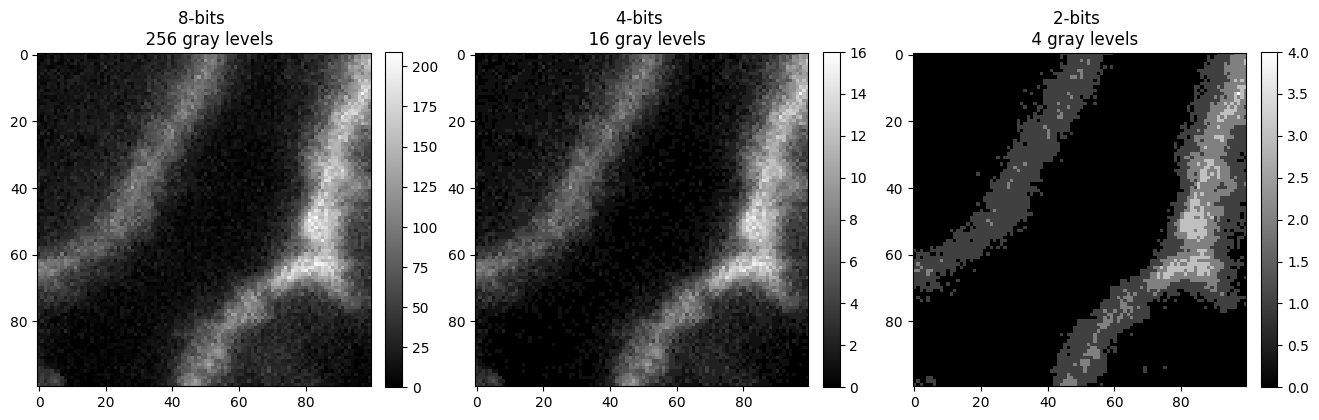

In [10]:
img8bit= img[0:100,0:100,1]

def convert(img, target_type_min, target_type_max, target_type):
    imin = img.min()
    imax = img.max()

    a = (target_type_max - target_type_min) / (imax - imin)
    b = target_type_max - a * imax
    new_img = (a * img + b).astype(target_type)
    return new_img


plt.figure(figsize=(16,8))

plt.subplot(1,3,1)
plt.title('8-bits \n  256 gray levels')
plt.imshow(img8bit, cmap='gray')
plt.colorbar(fraction=0.046, pad=0.04)

#img4bit=img8bit/16
img4bit = convert(img8bit, 0, 16, np.uint8)
plt.subplot(1,3,2)
plt.title('4-bits \n  16 gray levels')
plt.imshow(img4bit, interpolation="none", cmap='gray')
plt.colorbar(fraction=0.046, pad=0.04)


img2bit = convert(img8bit, 0, 4, np.uint8)
plt.subplot(1,3,3)
plt.title('2-bits \n  4 gray levels')
plt.imshow(img2bit, interpolation="none", cmap='gray')
plt.colorbar(fraction=0.046, pad=0.04)
plt.show()

#### Color maps and look up tables (LUT)

- Lookup tables do the mapping from a numeric pixel value to a color.
- This is the main mechanism how we visualise microscopy image data.

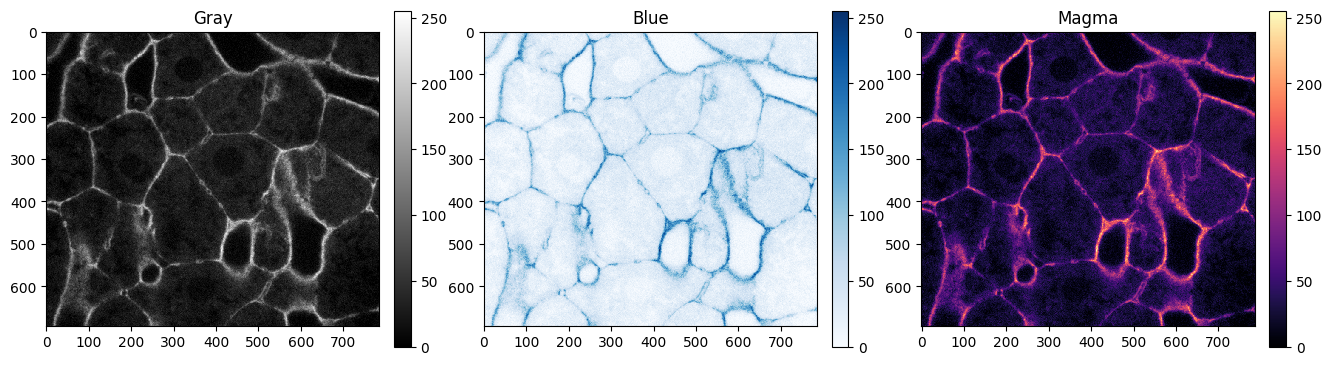

In [11]:
# visualise with different color map

plt.figure(figsize=(16,8))

plt.subplot(1,3,1)
plt.title('Gray')
plt.imshow(img[:,:,1],interpolation='none',cmap='gray')  # the color map is gray
plt.colorbar(fraction=0.046, pad=0.04)
plt.subplot(1,3,2)
plt.title('Blue')
plt.imshow(img[:,:,1],interpolation='none',cmap='Blues') # the color map is blues
plt.colorbar(fraction=0.046, pad=0.04)
plt.subplot(1,3,3)
plt.title('Magma')
plt.imshow(img[:,:,1],interpolation='none',cmap='magma') # the color map is blues
plt.colorbar(fraction=0.046, pad=0.04)
plt.show()


## 3. Image arithmetic and unexpected errors

#### Adding an integer valua to an 8-bits image

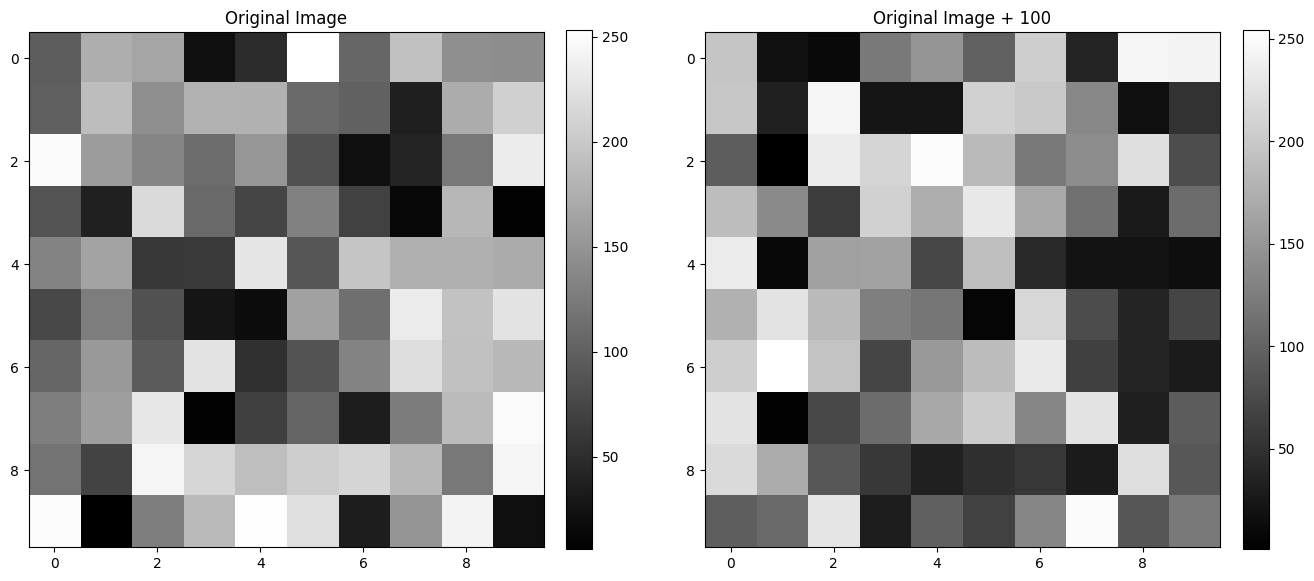

Values are calculated modulo 256


Arithmetics which loops around is called modulo arithmetic


[[ 96 174 166  21  49 253 105 193 144 143]
 [ 98 189 144 178 177 108 100  36 172 207]
 [249 157 135 112 151  85  21  40 122 234]
 [ 88  38 217 108  73 131  69  14 183   8]
 [134 165  60  62 227  89 197 176 176 171]
 [ 76 127  85  27  18 162 114 233 194 226]
 [105 154  94 226  53  87 133 221 193 184]
 [127 159 229   8  68 103  34 126 187 248]
 [117  71 243 213 190 204 212 184 122 243]
 [250   6 128 186 252 223  34 150 242  21]]


[[196  18  10 121 149  97 205  37 244 243]
 [198  33 244  22  21 208 200 136  16  51]
 [ 93   1 235 212 251 185 121 140 222  78]
 [188 138  61 208 173 231 169 114  27 108]
 [234   9 160 162  71 189  41  20  20  15]
 [176 227 185 127 118   6 214  77  38  70]
 [205 254 194  70 153 187 233  65  37  28]
 [227   3  73 108 168 203 134 226  31  92]
 [217 171  87  57  34  48  56  28 222  87]
 [ 94 106 228  30  96  67 134 250  86 121]]




In [12]:
# Add integer value to an image

dataimgAdd = dataimg+100

# show results
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(dataimg,cmap="gray", interpolation='None')
plt.colorbar(fraction=0.046, pad=0.04)

plt.subplot(1,2,2)
plt.title('Original Image + 100')
data_plot = plt.imshow(dataimgAdd,cmap="gray", interpolation='None')
plt.colorbar(fraction=0.046, pad=0.04)
plt.show()


print('Values are calculated modulo 256')
print('\n')
print('Arithmetics which loops around is called modulo arithmetic')
print('\n')

print(dataimg)
print('\n')
print(dataimgAdd)
print('\n')


## 4. Getting some simple statistics

Let's calculate some simple statistics from the image intensities

#### Import and vizualize the image

In [13]:
img = io.imread('/content/drive/MyDrive/IntroBioImageAnalysis-main/2D_image_nuclei_cells_liver.tif')        # import image
print('Image dimension: ', img.shape)
print('Number of Channels: ', img.shape[2])
print('Image type: ', img.dtype)
ChannelNames = ["Endosomes", "Membranes", "Nuclei"]  # list with channels' names



Image dimension:  (694, 786, 3)
Number of Channels:  3
Image type:  uint8


In [14]:
# plot the image channels using a defined function

def myplt(img, title):
    """This function displays the input image with interpolation='none' and cmap='magma'. """
    plt.imshow(img,interpolation='none',cmap='magma')
    plt.colorbar(fraction=0.046, pad=0.04)
    plt.title(title)



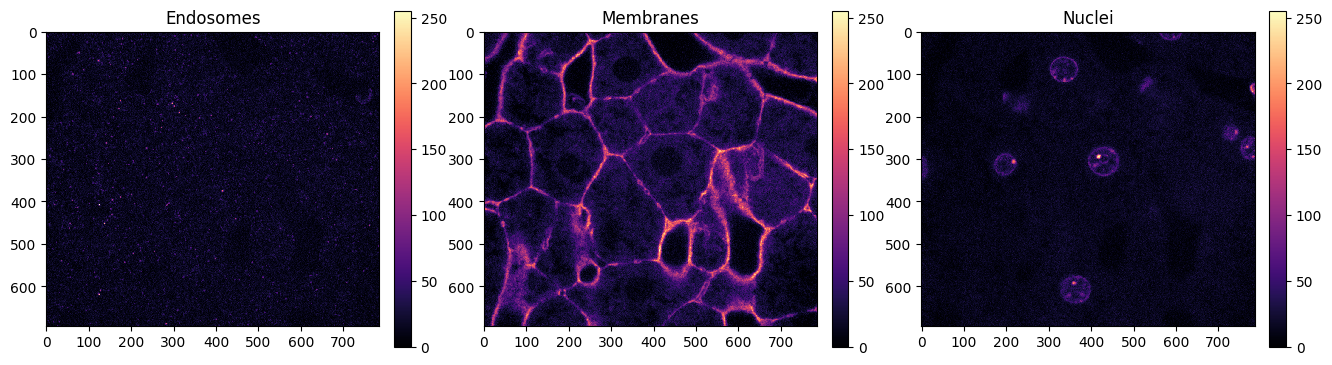

In [15]:
plt.figure(figsize=(16,8))
ch = 0
while ch < img.shape[-1]:
    plt.subplot(1,3,ch+1)
    myplt(img[:,:,ch], ChannelNames[ch])
    ch = ch +1


In [16]:
# Get each channel and get mean intensity values
Endosomes = img[:,:,0]
Membranes = img[:,:,1]
Nuclei = img[:,:,2]

mean_Endosomes = np.mean(Endosomes)
mean_Membranes = np.mean(Membranes)
mean_Nuclei = np.mean(Nuclei)

std_Endosomes = np.std(Endosomes)
std_Membranes = np.std(Membranes)
std_Nuclei = np.std(Nuclei)


In [17]:
# store results  in a dictionary
results = {'Structure':[], 'Mean intensity':[], 'Std intensity':[]}
results['Structure'] = ChannelNames
results['Mean intensity'] = [mean_Endosomes, mean_Membranes, mean_Nuclei]
results['Std intensity'] = [std_Endosomes, std_Membranes, std_Nuclei]

print(results)

{'Structure': ['Endosomes', 'Membranes', 'Nuclei'], 'Mean intensity': [14.844616890687902, 37.03784528968769, 13.794960072156103], 'Std intensity': [9.220924008932009, 31.88791340538846, 9.928484912170934]}


In [18]:
# save quantitative data to json file
import json
json.dump(results, open("results.txt", 'w'))